In [1]:
# Import libraries and dependencies
import os 
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API")
alpaca_secret_key = os.getenv("ALPACA_SECRET")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [3]:
                                  # 1 year data fetch
# Set cramer pick tickers
tickers = ["AAPL", "AMD", "AMZN", "ATVI", "COST", "CPB", "DPZ", "ETSY", "FB", "GOOG", "MKC", "NFLX", "NVDA", "OKTA", "PEP", "PLD", "SHOP", "TTWO", "WING", "ZM"] 

# Set start and end dates
start_date = pd.Timestamp("2020-03-06", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-05", tz="America/New_York").isoformat()

# Set timeframe to 1D
timeframe = "1D"

# Fetch price data
ticker_data = api.get_barset(
    tickers, 
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview df
ticker_data.head()

AAPL                                       AMD  \
                             open    high     low   close     volume   open   
time                                                                          
2020-03-06 00:00:00-05:00  282.00  290.82  281.23  288.98   51462221  49.46   
2020-03-09 00:00:00-04:00  263.75  278.09  263.00  266.09  131779754  43.03   
2020-03-10 00:00:00-04:00  277.14  286.44  269.37  285.69   65679929  45.41   
2020-03-11 00:00:00-04:00  277.39  281.22  271.86  275.30   58216000  44.19   
2020-03-12 00:00:00-04:00  255.94  270.00  248.00  248.00   96606887  42.00   

                                                            ...   WING  \
                            high    low   close     volume  ...   open   
time                                                        ...          
2020-03-06 00:00:00-05:00  49.54  46.74  48.600  117513388  ...  77.15   
2020-03-09 00:00:00-04:00  46.34  42.51  43.260  151826804  ...  74.18   
2020-03-10 00:00:00-04:00  45.44  43.10  45.380   72130289  ...  77.30   
2020-03-11 00:00:00-04:00  45.97  43.80  45.690   97129692  ...  74.16   
2020-03-12 00:00:00-04:00  42.50  39.00  39.005   93019685  ...  66.72   

                                                               ZM            \
                             high     low  close   volume    open      high   
time                                                                          
2020-03-06 00:00:00-05:00  80.910  76.440  79.28  1080468  119.65  122.0000   
2020-03-09 00:00:00-04:00  76.635  74.050  74.76   721617  105.00  116.5000   
2020-03-10 00:00:00-04:00  78.700  72.635  76.17   422679  113.80  113.8000   
2020-03-11 00:00:00-04:00  74.190  70.000  71.57   659010  108.41  113.9900   
2020-03-12 00:00:00-04:00  69.500  63.920  68.26  1010453  106.00  113.8712   

                                                         
                              low     close      volume  
time                                                     
2020-03-06 00:00:00-05:00  107.00  114.3300  45566924.0  
2020-03-09 00:00:00-04:00  100.88  113.7500  13445523.0  
2020-03-10 00:00:00-04:00  105.00  108.4858  10004808.0  
2020-03-11 00:00:00-04:00  107.00  110.2600  12464414.0  
2020-03-12 00:00:00-04:00  104.39  109.4700  11884503.0  

[5 rows x 100 columns]

In [4]:
                                  # Run MC simulation
# set sim amount
num_sims = 500

# forcast one year daily returns for cramer picks
MC_CP = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252
)

# Run 1 year sim
MC_CP.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007583,1.003776,0.991513,1.003017,1.000560,1.013436,0.996548,1.009835,1.006438,1.002084,...,0.993491,1.001336,1.012651,0.994910,1.002827,0.994255,1.003963,0.997893,0.996585,1.007355
2,1.024590,1.009834,0.988538,0.995580,0.991519,1.022658,1.017246,1.010545,0.998020,1.010605,...,1.006241,1.015790,1.011207,1.001245,1.000498,0.999597,0.998675,0.996335,1.003694,0.992269
3,1.038576,1.018026,0.986139,0.999363,0.980682,1.023078,1.010780,1.005260,0.999246,1.010798,...,1.002909,1.022871,0.996683,1.007505,1.002113,0.994146,1.004460,0.989012,1.003819,0.988084
4,1.029959,1.026795,0.985824,1.004441,0.982903,1.030043,1.014116,1.004766,1.006051,1.009600,...,1.003536,1.028293,1.000338,1.002367,1.000988,0.990594,1.014270,0.982906,1.017270,0.995480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.597148,1.768875,1.364772,1.459134,1.509339,1.662851,1.970153,1.510608,1.841217,1.450265,...,1.480780,1.424421,1.408140,1.237262,1.760401,1.364788,1.529906,1.506379,1.842975,1.212087
249,1.575480,1.770890,1.357146,1.461384,1.518954,1.661299,1.988741,1.497593,1.838717,1.446053,...,1.482542,1.436709,1.414616,1.242512,1.756229,1.364144,1.514952,1.487538,1.810382,1.215787
250,1.590142,1.756434,1.363609,1.458261,1.522924,1.657447,1.989148,1.513781,1.838910,1.458727,...,1.500686,1.440647,1.418826,1.251857,1.753091,1.367857,1.512836,1.487612,1.793683,1.220051
251,1.582150,1.782928,1.354050,1.467494,1.507787,1.675928,2.012046,1.519504,1.841959,1.462576,...,1.515213,1.447983,1.414155,1.243973,1.763255,1.372895,1.523373,1.481555,1.810585,1.218284


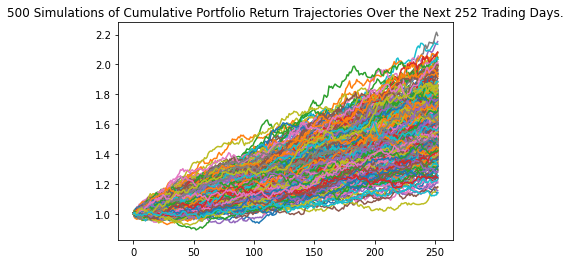

In [5]:
# display outcomes on line plot
line_plot = MC_CP.plot_simulation()

In [6]:
# Calc sim sum stats
sim_daily_return = {
    "mean": list(MC_CP.simulated_return.mean(axis=1)),
    "median": list(MC_CP.simulated_return.median(axis=1)),
    "min": list(MC_CP.simulated_return.min(axis=1)),
    "max": list(MC_CP.simulated_return.max(axis=1))
}

# Create sum stat df
sim_return_df = pd.DataFrame(sim_daily_return)

# Display sample data
sim_return_df.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.002042,1.001976,0.972634,1.027213
2,1.004043,1.004268,0.967029,1.034940
3,1.006165,1.005862,0.962385,1.046691
4,1.008339,1.008342,0.966245,1.048578


<AxesSubplot:title={'center':'1 Year Daily Returns of Cramer Portfolio Simulation'}>

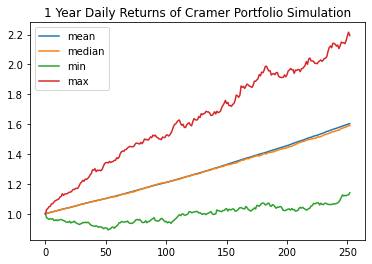

In [7]:
# Display data visual
sim_return_df.plot(title="1 Year Daily Returns of Cramer Portfolio Simulation")

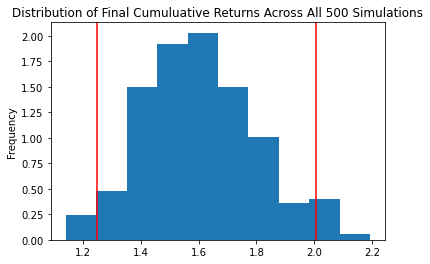

In [8]:
# Plot probability distribution and confidence intervals
dist_plot = MC_CP.plot_distribution()

In [9]:
# Sim returns of investing $5k 

# Set initial investment
initial_investment = 5000 

# Calculate progression of profits and losses
cumulative_pl = initial_investment * sim_return_df

# Display sample data
cumulative_pl.head()

,mean,median,min,max
0,5000.000000,5000.000000,5000.000000,5000.000000
1,5010.211753,5009.878942,4863.168099,5136.063258
2,5020.216033,5021.338484,4835.142503,5174.699428
3,5030.824885,5029.307806,4811.926310,5233.452769
4,5041.694540,5041.711215,4831.222902,5242.888639


<AxesSubplot:title={'center':'1 Year Sim Profits and Losses of Cramer Portfolio'}>

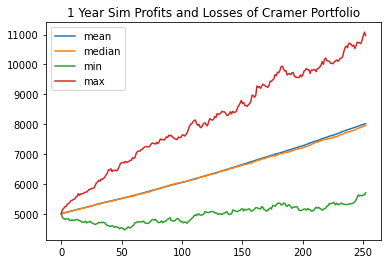

In [10]:
# Plot chart of sim P/L
cumulative_pl.plot(title="1 Year Sim Profits and Losses of Cramer Portfolio")

In [11]:
# Calculate range of possible outcomes for $5k investment

# Call summary statistics from sim
table = MC_CP.summarize_cumulative_return()

# Print stats
print(table)

count           500.000000
mean              1.603037
std               0.193117
min               1.139886
25%               1.463421
50%               1.590359
75%               1.725739
max               2.193419
95% CI Lower      1.248185
95% CI Upper      2.007021
Name: 252, dtype: float64


In [12]:
# Use confidence intervals to calculate the range of possible outcomes for investment
ci_lower = round(table[8]*5000,2)
ci_upper = round(table[9]*5000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $5000 in Cramers portfolio over the  next year will end within the range of ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $5000 in Cramers portfolio over the  next year will end within the range of $6240.93 and $10035.1.
